In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Authorising API access

In [2]:
# replace by your own access logins
log = pd.read_json('twitter_API.json')

consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)

### Scraping @peta's twitter account

In [3]:
account = 'peta'
tweets = tweepy.Cursor(api.search,
                       q = account,
                       lang='en',
                       exclude_replies=True,
                       full_text=True,
                      ).items(200)

In [4]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
df.head(10)

,tweets
0,RT @peta: It just doesn’t make sense.\n \nMarm...
1,one peta left 🧎‍♀️🧎‍♀️
2,RT @peta: Don’t be that person who has a tempe...
3,RT @PETAUK: #ReasonsToGoVegan\nUp for it? Here...
4,@rain4estwhitaka is that the one with Katniss ...
5,I JUST FINISHED MY LAST PETA/EXAM😭 ugh god tha...
6,RT @peta: Don’t be that person who has a tempe...
7,Please sign and share. https://t.co/TEa16n76Vc
8,RT @nwinograd: Today is the anniversary of PET...
9,RT @peta: Don’t be that person who has a tempe...


In [5]:
j=1

for i in range(0, df.shape[0]):
    print(str(j) + '. ' + df['tweets'][i] + '\n')
    j += 1

1. RT @peta: It just doesn’t make sense.
 
Marmosets don’t experience menopause. So why is @UMassAmherst subjecting them to cruel and useless…

2. one peta left 🧎‍♀️🧎‍♀️

3. RT @peta: Don’t be that person who has a temper tantrum and takes it out on their dog. https://t.co/AzFxf4oIwp

4. RT @PETAUK: #ReasonsToGoVegan
Up for it? Here you go: https://t.co/0tIbv16buX
#veganchallenge
#worldveganmonth https://t.co/YESpVEviVa

5. @rain4estwhitaka is that the one with Katniss and Peta?

6. I JUST FINISHED MY LAST PETA/EXAM😭 ugh god that has been the most tiring two weeks of my life 😩

7. RT @peta: Don’t be that person who has a temper tantrum and takes it out on their dog. https://t.co/AzFxf4oIwp

8. Please sign and share. https://t.co/TEa16n76Vc

9. RT @nwinograd: Today is the anniversary of PETA's theft and killing of Maya: https://t.co/uysk8ysJQ7.

My article not only tell's Maya's st…

10. RT @peta: Don’t be that person who has a temper tantrum and takes it out on their dog. https://t.co/

### Data Cleaning

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # removes @mentions
    text = re.sub(r'#', '', text) # removes hashtag symbols
    text = re.sub(r'RT[\s]+', '', text) # removes RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removes hyperlinks
    text = re.sub(r':', '', text) # removes remaining ':'
    
    return text

df['tweets'] = df['tweets'].apply(cleanTxt)
df

,tweets
0,It just doesn’t make sense.\n \nMarmosets don...
1,one peta left 🧎‍♀️🧎‍♀️
2,Don’t be that person who has a temper tantrum...
3,ReasonsToGoVegan\nUp for it? Here you go \nve...
4,is that the one with Katniss and Peta?
...,...
195,So we should bring Tigers in our homes?????
196,I eat DOGS.
197,The animal rights organization PETA said it i...
198,Its upto evryone but why on the occasion…


### Word Cloud

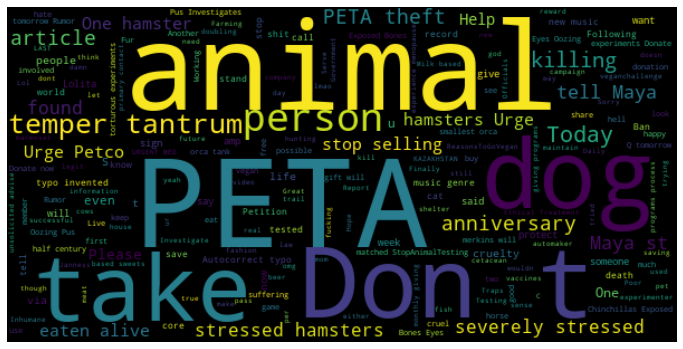

In [7]:
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=600, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.figure(figsize=(12,8))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Subjectivity and Polarity

In [8]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
    
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)
df

,tweets,Subjectivity,Polarity
0,It just doesn’t make sense.\n \nMarmosets don...,1.0,-1.0
1,one peta left 🧎‍♀️🧎‍♀️,0.0,0.0
2,Don’t be that person who has a temper tantrum...,0.0,0.0
3,ReasonsToGoVegan\nUp for it? Here you go \nve...,0.0,0.0
4,is that the one with Katniss and Peta?,0.0,0.0
...,...,...,...
195,So we should bring Tigers in our homes?????,0.0,0.0
196,I eat DOGS.,0.0,0.0
197,The animal rights organization PETA said it i...,0.0,0.0
198,Its upto evryone but why on the occasion…,0.0,0.0


### Sentiment Analysis

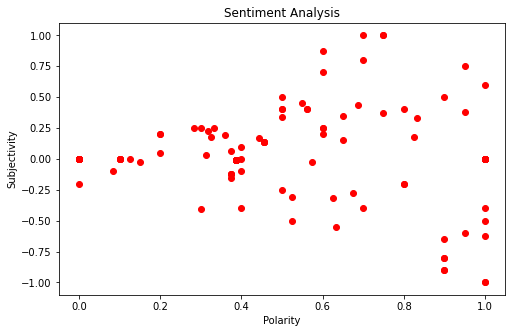

In [9]:
plt.figure(figsize=(8,5))
for i in range(0, df.shape[0]):
    plt.scatter(df['Subjectivity'][i], df['Polarity'][i], color='red')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [10]:
# to export dataframe

# df.to_csv(r'new_export.csv', index = False)

### K-Means

In [11]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [12]:
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(df[['Subjectivity', 'Polarity']])
kmeans.cluster_centers_

array([[ 0.65107537,  0.441821  ],
       [ 0.09150391,  0.00367839],
       [ 0.88020833, -0.29003788]])

In [13]:
df['Clusters'] = kmeans.labels_
df.head()

,tweets,Subjectivity,Polarity,Clusters
0,It just doesn’t make sense.\n \nMarmosets don...,1.0,-1.0,2
1,one peta left 🧎‍♀️🧎‍♀️,0.0,0.0,1
2,Don’t be that person who has a temper tantrum...,0.0,0.0,1
3,ReasonsToGoVegan\nUp for it? Here you go \nve...,0.0,0.0,1
4,is that the one with Katniss and Peta?,0.0,0.0,1


In [14]:
df['Clusters'].value_counts()

1    128
2     40
0     32
Name: Clusters, dtype: int64

<AxesSubplot:title={'center':'K-Means on Sentiment Analysis (n=3)'}, xlabel='Subjectivity', ylabel='Polarity'>

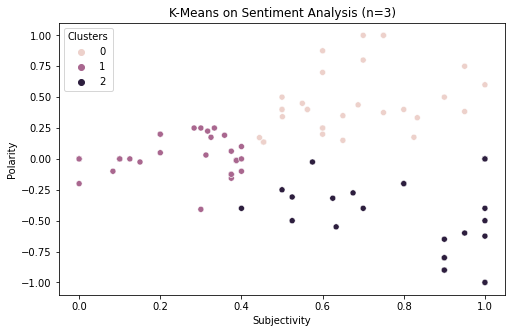

In [15]:
plt.figure(figsize=(8,5))
plt.title('K-Means on Sentiment Analysis (n=3)')
sns.scatterplot(x='Subjectivity', y='Polarity', hue='Clusters', data=df)

### Fine-tuning with hyper-parameter : n_neighbors

In [16]:
from sklearn import neighbors
import beautiful_plots as bp

In [17]:
subjectivity = df.iloc[:, 1].values
polarity = df.iloc[:, 2].values

X = list(zip(subjectivity, polarity))
X = np.array(X)
y = df.iloc[:, 3].values

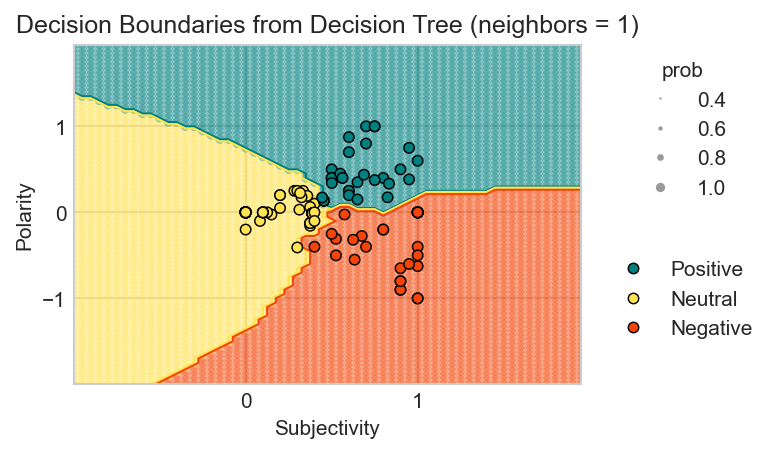

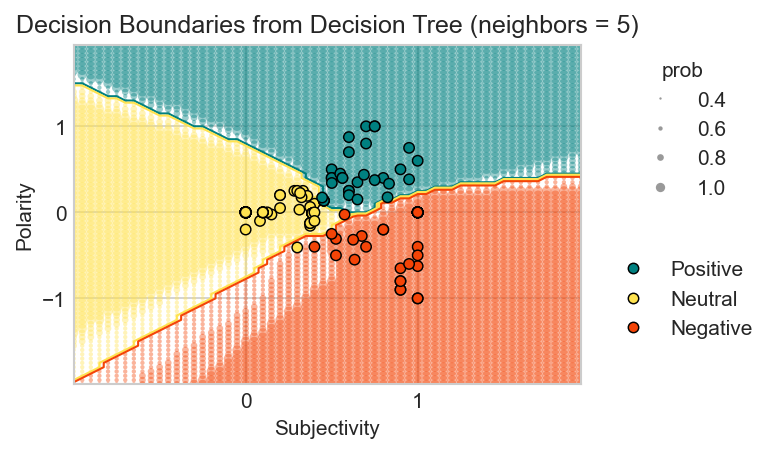

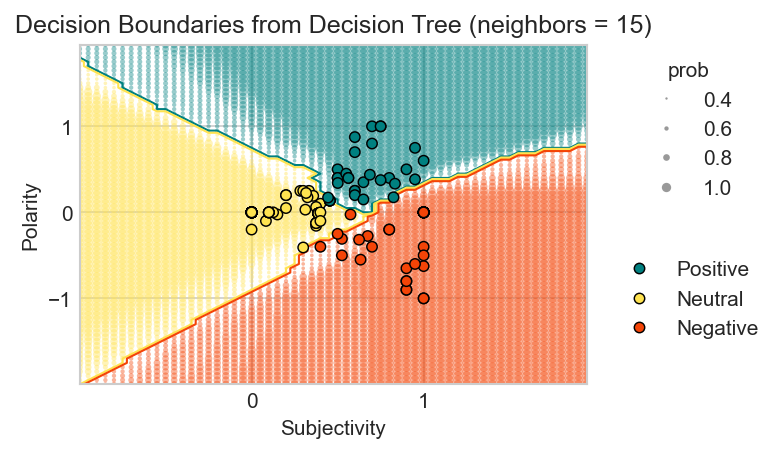

In [18]:
for k in [1, 5, 15]:

    N_NEIGHBORS = k # KNN number of neighbors
    H = 0.05 # mesh stepsize
    PROB_DOT_SCALE = 20 # modifier to scale the probability dots
    PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
    TRUE_DOT_SIZE = 25 # size of the true labels
    PAD = 1 # how much to "pad" around the true labels

    # establish colors and colormap
    purple_teal_yellow = ['#008080', '#FFE350', '#F44407']
    colormap = np.array(purple_teal_yellow)

    #establish classes
    classes = ['Positive','Neutral','Negative']

    knn = neighbors.KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
    knn.fit(X, y)

    # use function
    bp.plot_decision_boundary2D(knn, X, y.copy(), classes, colormap, 
                             step=H, 
                             prob_dot_scale=PROB_DOT_SCALE, 
                             prob_dot_scale_power=PROB_DOT_SCALE_POWER,
                             true_dot_size=TRUE_DOT_SIZE, 
                             pad=PAD,k=k)